In [43]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [44]:
def make_background_white_and_add_noise_and_binarize(image, noise_level=30, threshold=128):
    image = image.convert("L")

    img_array = np.array(image)

    binarized_array = np.where(img_array > threshold, 255, 0).astype(np.uint8)

    binarized_image = Image.fromarray(binarized_array)

    noise = np.random.randint(-noise_level, noise_level, binarized_array.shape, dtype=np.int16)
    noisy_image = np.clip(binarized_image + noise, 0, 255).astype(np.uint8)

    noisy_image = Image.fromarray(noisy_image)
    
    return noisy_image

In [45]:
def calculate_binarization_percentage(image, threshold=128):
    """
    Calcula el porcentaje de píxeles binarizados en una imagen en escala de grises.
    Un píxel se considera binarizado si es completamente blanco (255) o negro (0).
    
    :param image: Imagen PIL en escala de grises.
    :param threshold: Umbral para la clasificación de píxeles binarizados.
    :return: Porcentaje de píxeles binarizados.
    """
    gray_image = image.convert("L")

    img_array = np.array(gray_image)

    binarized_pixels = np.sum((img_array == 0) | (img_array == 255))

    total_pixels = img_array.size
    percentage_binarized = (binarized_pixels / total_pixels) * 100
    
    return percentage_binarized

In [46]:
def classify_image(image, binarization_threshold=50):
    """
    Clasifica una imagen como 'válida' o 'inválida' basándose en el porcentaje
    de píxeles binarizados comparado con un umbral.
    
    :param image: Imagen PIL en escala de grises.
    :param binarization_threshold: Umbral de porcentaje de binarización.
    :return: 'válida' o 'inválida'.
    """
    binarization_percentage = calculate_binarization_percentage(image)

    if binarization_percentage >= binarization_threshold:
        return "inválida"
    else:
        return "válida"

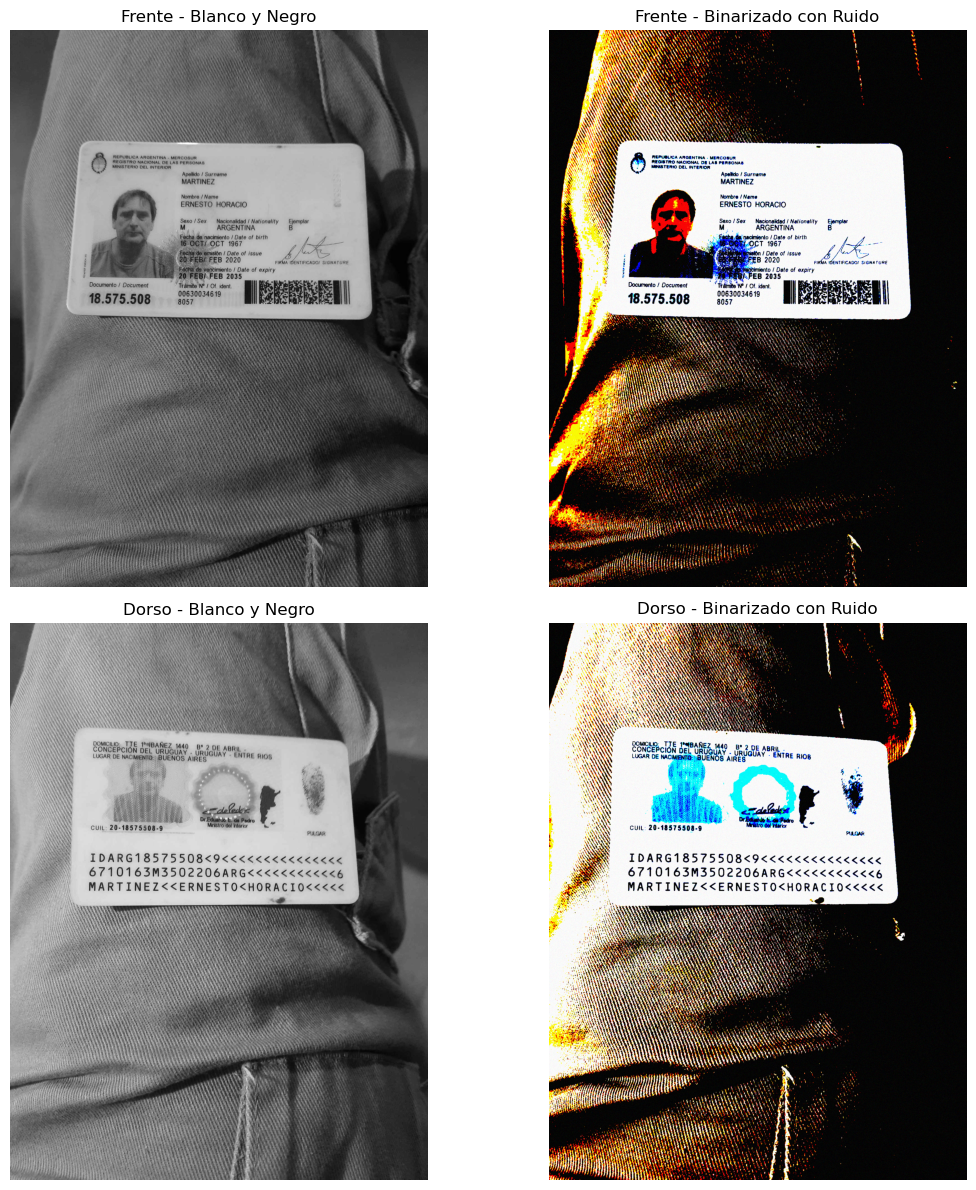

In [47]:
image_path_frente = 'prueba/imagen_1_frente.jpeg'
image_path_dorso = 'prueba/imagen_1_dorso.jpeg'

image_frente = Image.open(image_path_frente)
image_dorso = Image.open(image_path_dorso)

# Convertir imágenes a blanco y negro y binarizadas
image_frente_blanco_y_negro = image_frente.convert("L")
image_dorso_blanco_y_negro = image_dorso.convert("L")

# Guardar las imágenes blanco y negro
image_frente_blanco_y_negro.save('prueba/validas/imagen_1_blanco_y_negro_frente.jpeg')
image_dorso_blanco_y_negro.save('prueba/validas/imagen_1_blanco_y_negro_dorso.jpeg')

# Aplicar la función de ruido y binarización a ambas imágenes
image_frente_fotocopia = make_background_white_and_add_noise_and_binarize(image_frente)
image_dorso_fotocopia = make_background_white_and_add_noise_and_binarize(image_dorso)

# Guardar las imágenes procesadas (binarizadas con ruido)
image_frente_fotocopia.save('prueba/invalidas/imagen_1_frente_fotocopia.jpeg')
image_dorso_fotocopia.save('prueba/invalidas/imagen_1_dorso_fotocopia.jpeg')

# Crear una figura con 2 filas y 2 columnas para las imágenes
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Mostrar el "frente" en blanco y negro y binarizado
axs[0, 0].imshow(image_frente_blanco_y_negro, cmap='gray')
axs[0, 0].set_title("Frente - Blanco y Negro")
axs[0, 0].axis("off")

axs[0, 1].imshow(image_frente_fotocopia, cmap='gray')
axs[0, 1].set_title("Frente - Binarizado con Ruido")
axs[0, 1].axis("off")

# Mostrar el "dorso" en blanco y negro y binarizado
axs[1, 0].imshow(image_dorso_blanco_y_negro, cmap='gray')
axs[1, 0].set_title("Dorso - Blanco y Negro")
axs[1, 0].axis("off")

axs[1, 1].imshow(image_dorso_fotocopia, cmap='gray')
axs[1, 1].set_title("Dorso - Binarizado con Ruido")
axs[1, 1].axis("off")

# Ajustar la visualización y mostrar el gráfico
plt.tight_layout()
plt.show()

In [48]:
print(f"Imagen valida frente: {classify_image(image_frente)}")
print(f"Imagen valida dorso: {classify_image(image_dorso)}")
print(f"Imagen invalida frente: {classify_image(image_frente_fotocopia)}")
print(f"Imagen invalida dorso: {classify_image(image_dorso_fotocopia)}")

Imagen valida frente: válida
Imagen valida dorso: válida
Imagen invalida frente: válida
Imagen invalida dorso: válida
